# Timelapse microscopy preparation
In this code, I take the output of Supersegger's drift correction, crop it to a representative region, add a time stamp and scale bar, then save as individual slices. This is applied for both supplemental movies.

In [1]:
# import relevant packages. 
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = "Arial" #Set global font to arial
import glob,os
import warnings
import re
from skimage.io import imread
warnings.filterwarnings("ignore")

All image data are too large to be included in Github. Raw image data are included in Biostudies (ID NUMBER). Supersegger outputs all slices as individual images with the example format "bb662_min_iptg_06_t00000xy006c1.tif." Here, I can grap the t00000 number for the current frame and xy006 as the current microscope region. I conver the "t" number by mulitiplying it by 5 for the current time.

In this first chunk, I load the example first slice as an image for reference, and provide 8 images from diifferent time points. This allows me to narrow my crop window in such a way to accomodate the cell in all frames, as well as test where my labels will go. 

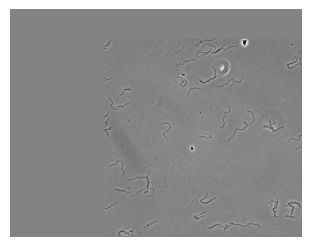

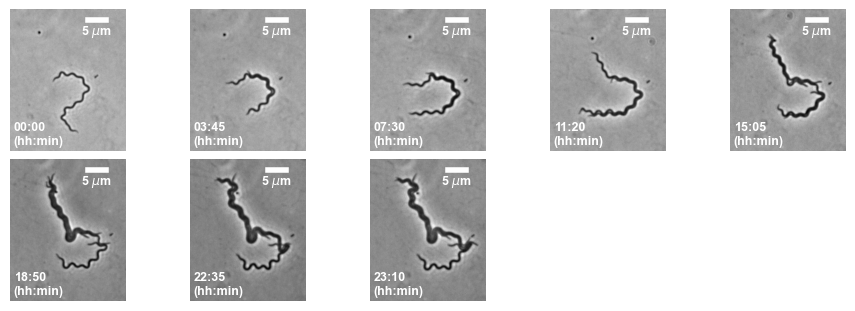

In [ ]:
# Since the images are too big to include on Github, here I specify on our lab server where the images are stored.
experiment_directory = '/Volumes/Common/Collaborations/Laura Dassama/HMG-CoA Reductase/timelapse/20251112-bb662_timelapse'

# Identify the source images. The wild type cell is in region XY06
ims = glob.glob(f'{experiment_directory}/for_supersegger/xy06/xy6/phase/*.tif')
# The example image for the first plot.
ex_im = imread(ims[0])

# Determine the number of example time slices I want to plot.
steps = np.arange(start=0,stop=len(ims),step=45)
steps = np.append(steps,len(ims)-1)

# the crop window. Iteratively adjust this until the window encompasses the cell I want.
crop_window = [1450,1000,1775,1400] # minx, miny, maxx, maxy

# The pixel size for the microscope I used in this experiment.
px_size = 0.0981

# scale bar size in microns
scale_bar_size = 5 #answer in microns

# determine the number of pixels in the specicied scale bar size.
px_for_scale_bar = scale_bar_size/px_size #divide the scale bar size by the pixel size

# make the whole image plot.
fig,_ax = plt.subplots(figsize=[3,3],layout='constrained')
_ax.imshow(ex_im,cmap='gray',vmin=ex_im.min(),vmax=10000)

_ax.spines[['top','right','left','bottom']].set_visible(False)
_ax.set_xticks([])
_ax.set_yticks([])


# Now plot the 8 time slices.
fig,axs = plt.subplots(nrows = 2, ncols = 5, figsize=[9,3],layout='constrained')
axs = axs.ravel()
ax_idx = 0
for im_idx in steps:
    _ax = axs[ax_idx]
    file = ims[im_idx]
    filename = os.path.basename(file).removesuffix('.tif')

    # extract the current frame from the filename.
    t = int(re.findall('(?<=t)\d+',filename)[0])
    t = t*5 # one frame every five minutes.
    hrs,min = divmod(t,60) # determine the hours and minutes from the minutes.
    
    ex_im = imread(file)
    
    # apply the crop window to the current frame.
    cropped_im = ex_im[crop_window[1]:crop_window[3],crop_window[0]:crop_window[2]]
    _ax.imshow(cropped_im,cmap='gray',vmin=cropped_im.min(),vmax=cropped_im.max())

    # add the scale bar and text to the image. Fiddle with numbers until they are in the desired position.
    _ax.plot([220,220+px_for_scale_bar],[30,30],'-',color='white',linewidth=4)
    _ax.text(200,70,'5 $\mu$m',fontsize=9,weight='bold',color='white')
    _ax.text(10,380,f'{hrs:02}:{min:02}\n(hh:min)',fontsize=9,weight='bold',horizontalalignment='left',color='white')
    _ax.spines[['top','right','left','bottom']].set_visible(False)
    _ax.set_xticks([])
    _ax.set_yticks([])
    ax_idx += 1

# If there are spare axes after the legend, remove them.
for _ax in axs[ax_idx:]:
    _ax.remove()

This is the stage of fine refinement of all parameters. Here, I zoom in on one time slice and tweak all numbers for the final crop and label set. Otherwise, all code is the same as above.

[]

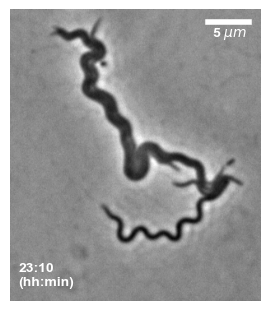

In [ ]:
experiment_directory = '/Volumes/Common/Collaborations/Laura Dassama/HMG-CoA Reductase/timelapse/20251112-bb662_timelapse'
ims = glob.glob(f'{experiment_directory}/for_supersegger/xy06/xy6/phase/*.tif')
_im = ims[-1]
crop_window = [1470,1030,1775,1385] # minx, miny, maxx, maxy
px_size = 0.0981
scale_bar_size = 5 #answer in microns
px_for_scale_bar = scale_bar_size/px_size #divide the scale bar size by the pixel size
scalebar_xpos = 240
scalebar_ypos = 15

fig,_ax = plt.subplots(figsize=[3,3],layout='constrained')
filename = os.path.basename(_im).removesuffix('.tif')
t = int(re.findall('(?<=t)\d+',filename)[0])
hrs,min = divmod(t*5,60)

ex_im = imread(_im)
cropped_im = ex_im[crop_window[1]:crop_window[3],crop_window[0]:crop_window[2]]
_ax.imshow(cropped_im,cmap='gray',vmin=cropped_im.min(),vmax=cropped_im.max())
_ax.plot([scalebar_xpos,scalebar_xpos+px_for_scale_bar],np.repeat(scalebar_ypos,2),'-',color='white',linewidth=4)
_ax.text(scalebar_xpos+5,scalebar_ypos+17,'5 $\mu m$',fontsize=10,weight='bold',color='white')
_ax.text(10,335,f'{hrs:02}:{min:02}\n(hh:min)',fontsize=10,weight='bold',horizontalalignment='left',color='white')
_ax.spines[['top','right','left','bottom']].set_visible(False)
_ax.set_xticks([])
_ax.set_yticks([])

Apply all parameters to every frame. This will save individual TIFs for every frame. Open them as a stack in FIJI to save as a movie.

In [ ]:
experiment_directory = '/Volumes/Common/Collaborations/Laura Dassama/HMG-CoA Reductase/timelapse/20251112-bb662_timelapse'
ims = glob.glob(f'{experiment_directory}/for_supersegger/xy06/xy6/phase/*.tif')
#_im = ims[0]
crop_window = [1470,1030,1775,1385] # minx, miny, maxx, maxy
px_size = 0.0981
scale_bar_size = 5 #answer in microns
px_for_scale_bar = scale_bar_size/px_size #divide the scale bar size by the pixel size
scalebar_xpos = 240
scalebar_ypos = 15

for _im in ims:
    fig,_ax = plt.subplots(figsize=[3,3],layout='constrained')
    filename = os.path.basename(_im).removesuffix('.tif')
    t = int(re.findall('(?<=t)\d+',filename)[0])
    hrs,min = divmod(t*5,60)

    ex_im = imread(_im)
    cropped_im = ex_im[crop_window[1]:crop_window[3],crop_window[0]:crop_window[2]]
    _ax.imshow(cropped_im,cmap='gray',vmin=cropped_im.min(),vmax=cropped_im.max())
    _ax.plot([scalebar_xpos,scalebar_xpos+px_for_scale_bar],np.repeat(scalebar_ypos,2),'-',color='white',linewidth=4)
    _ax.text(scalebar_xpos+5,scalebar_ypos+17,'5 µm',fontsize=10,weight='bold',color='white')
    _ax.text(10,335,f'{hrs:02}:{min:02}\n(hh:mm)',fontsize=10,weight='bold',horizontalalignment='left',color='white')
    _ax.spines[['top','right','left','bottom']].set_visible(False)
    _ax.set_xticks([])
    _ax.set_yticks([])
    plt.savefig(f'{experiment_directory}/movies/xy06/{filename}',dpi=200)
    plt.close()

Similar to the wild type condition above, I do the same process for the HmgR knockdown condition. Everything is the same except for the different microscope region: XY18.

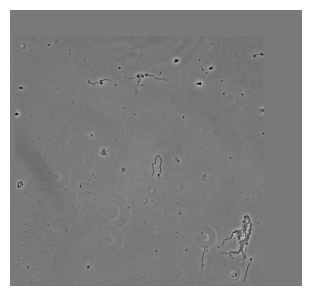

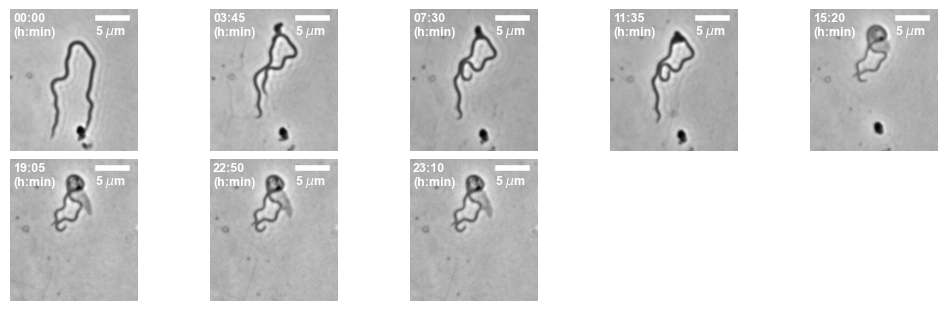

In [ ]:
experiment_directory = '/Volumes/Common/Collaborations/Laura Dassama/HMG-CoA Reductase/timelapse/20251112-bb662_timelapse'
ims = glob.glob(f'{experiment_directory}/for_supersegger/xy18/xy18/phase/*.tif')
ex_im = imread(ims[0])
steps = np.arange(start=0,stop=len(ims),step=45)
steps = np.append(steps,len(ims)-1)

crop_window = [1100,1150,1325,1400] # minx, miny, maxx, maxy
px_size = 0.0981
scale_bar_size = 5 #answer in microns
px_for_scale_bar = scale_bar_size/px_size #divide the scale bar size by the pixel size
scalebar_xpos = 155
scalebar_ypos = 15

hour_idx = 0
fig,_ax = plt.subplots(figsize=[3,3],layout='constrained')
_ax.imshow(ex_im,cmap='gray',vmin=ex_im.min(),vmax=ex_im.max())

_ax.spines[['top','right','left','bottom']].set_visible(False)
_ax.set_xticks([])
_ax.set_yticks([])

fig,axs = plt.subplots(nrows = 2, ncols = 5, figsize=[10,3],layout='constrained')
axs = axs.ravel()
ax_idx = 0
for im_idx in steps:
    _ax = axs[ax_idx]
    file = ims[im_idx]
    filename = os.path.basename(file).removesuffix('.tif')
    t = int(re.findall('(?<=t)\d+',filename)[0])
    t = t*5
    hrs,min = divmod(t,60)

    ex_im = imread(file)
    cropped_im = ex_im[crop_window[1]:crop_window[3],crop_window[0]:crop_window[2]]
    _ax.imshow(cropped_im,cmap='gray',vmin=cropped_im.min(),vmax=cropped_im.max())
    _ax.plot([scalebar_xpos,scalebar_xpos+px_for_scale_bar],[scalebar_ypos,scalebar_ypos],'-',color='white',linewidth=4)
    _ax.text(scalebar_xpos-5,scalebar_ypos+28,'5 µm',fontsize=9,weight='bold',color='white')
    _ax.text(5,scalebar_ypos+30,f'{hrs:02}:{min:02}\n(hh:mm)',fontsize=9,weight='bold',horizontalalignment='left',color='white')
    _ax.spines[['top','right','left','bottom']].set_visible(False)
    _ax.set_xticks([])
    _ax.set_yticks([])
    ax_idx += 1

# If there are spare axes after the legend, remove them.
for _ax in axs[ax_idx:]:
    _ax.remove()

[]

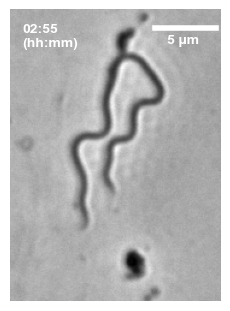

In [ ]:
experiment_directory = '/Volumes/Common/Collaborations/Laura Dassama/HMG-CoA Reductase/timelapse/20251112-bb662_timelapse'
ims = glob.glob(f'{experiment_directory}/for_supersegger/xy18/xy18/phase/*.tif')
_im = ims[35]
crop_window = [1125,1157,1300,1400] # minx, miny, maxx, maxy
px_size = 0.0981
scale_bar_size = 5 #answer in microns
px_for_scale_bar = scale_bar_size/px_size #divide the scale bar size by the pixel size
scalebar_xpos = 120
scalebar_ypos = 15

fig,_ax = plt.subplots(figsize=[3,3],layout='constrained')
filename = os.path.basename(_im).removesuffix('.tif')
t = int(re.findall('(?<=t)\d+',filename)[0])
hrs,min = divmod(t*5,60)

ex_im = imread(_im)
cropped_im = ex_im[crop_window[1]:crop_window[3],crop_window[0]:crop_window[2]]
_ax.imshow(cropped_im,cmap='gray',vmin=cropped_im.min(),vmax=cropped_im.max())
_ax.plot([scalebar_xpos,scalebar_xpos+px_for_scale_bar],np.repeat(scalebar_ypos,2),'-',color='white',linewidth=4)
_ax.text(scalebar_xpos+10,scalebar_ypos+12.5,'5 µm',fontsize=10,weight='bold',color='white')
_ax.text(10,scalebar_ypos+15,f'{hrs:02}:{min:02}\n(hh:mm)',fontsize=10,weight='bold',horizontalalignment='left',color='white')
_ax.spines[['top','right','left','bottom']].set_visible(False)
_ax.set_xticks([])
_ax.set_yticks([])

In [ ]:
experiment_directory = '/Volumes/Common/Collaborations/Laura Dassama/HMG-CoA Reductase/timelapse/20251112-bb662_timelapse'
ims = glob.glob(f'{experiment_directory}/for_supersegger/xy18/xy18/phase/*.tif')
_im = ims[0]
crop_window = [1125,1157,1300,1400] # minx, miny, maxx, maxy
px_size = 0.0981
scale_bar_size = 5 #answer in microns
px_for_scale_bar = scale_bar_size/px_size #divide the scale bar size by the pixel size
scalebar_xpos = 120
scalebar_ypos = 10

for _im in ims:
    fig,_ax = plt.subplots(figsize=[3,3],layout='constrained')
    filename = os.path.basename(_im).removesuffix('.tif')
    t = int(re.findall('(?<=t)\d+',filename)[0])
    hrs,min = divmod(t*5,60)

    ex_im = imread(_im)
    cropped_im = ex_im[crop_window[1]:crop_window[3],crop_window[0]:crop_window[2]]
    _ax.imshow(cropped_im,cmap='gray',vmin=cropped_im.min(),vmax=cropped_im.max())
    _ax.plot([scalebar_xpos,scalebar_xpos+px_for_scale_bar],np.repeat(scalebar_ypos,2),'-',color='white',linewidth=4)
    _ax.text(scalebar_xpos+10,scalebar_ypos+12.5,'5 µm',fontsize=10,weight='bold',color='white')
    _ax.text(10,scalebar_ypos+15,f'{hrs:02}:{min:02}\n(hh:mm)',fontsize=10,weight='bold',horizontalalignment='left',color='white')
    _ax.spines[['top','right','left','bottom']].set_visible(False)
    _ax.set_xticks([])
    _ax.set_yticks([])
    plt.savefig(f'{experiment_directory}/movies/xy18/{filename}',dpi=200)
    plt.close()